<a href="https://colab.research.google.com/github/LMAPcoder/Machine-Learning-Lab/blob/main/Exercise_sheet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab Programming Machine Learning**

## Exercise Sheet 6

### Exercise 0: Dataset Preprocessing

In [ ]:
#Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

Generating a Sample dataset D1

In [ ]:
np.random.seed(3116)
mu = 1
sd = 0.05
a = mu-(1/2)*(12**(1/2))*sd
b = mu+(1/2)*(12**(1/2))*sd
x = np.random.uniform(low=a,high=b,size=(100,1))

psi = np.random.rand(100,1)
y = 1.3*x**2+4.8*x+8+psi

D1 = np.concatenate((x,y),axis=1)

Preprocessing Wine Quality D2

In [ ]:
#Uploading the file
!wget --no-check-certificate 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' -O winequality-red.csv

--2021-12-19 19:53:22--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘ACSF1_TRAIN.tsv’

ACSF1_TRAIN.tsv     100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2021-12-19 19:53:23 (630 KB/s) - ‘ACSF1_TRAIN.tsv’ saved [84199/84199]



In [ ]:
winequalityred = pd.read_csv('winequality-red.csv',sep=';')

In [ ]:
winequalityred.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
winequalityred['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Note: This output reveals that this is a multiclass classification problem. However, linear regression will be used according to the instructions.

In [ ]:
winequalityred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Split of train and test data on D2

In [ ]:
X = winequalityred.drop('quality',axis=1).to_numpy()
y = winequalityred['quality'].to_numpy()
np.random.seed(3116)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2,shuffle=True)

Stochastic Gradient Descent (SGD) training

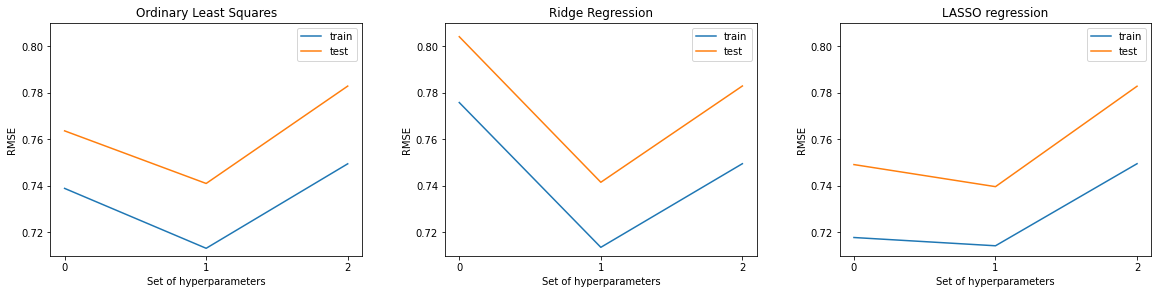

In [ ]:
#Grid builder
grid = np.array([0.0001,0.00001,0.000001]) #etas (learning rates)

#Plot builder
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)

#Ordinary Least Squares model
rmse_train = []
rmse_test = []
for _ in grid:
  reg = linear_model.SGDRegressor(
      eta0=_, #initial learning rate
      learning_rate='constant',
      penalty=None, #regularization term type
      max_iter=1000, #maximum number of epochs
      fit_intercept=True, #bias
      shuffle=False #shuffling of data after each epoch
  )
  reg.fit(X_train, y_train)
  y_train_pred = reg.predict(X_train)
  rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
  y_test_pred = reg.predict(X_test)
  rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

#Plot
ax1.set_title('Ordinary Least Squares')
ax1.set_xlabel('Set of hyperparameters')
ax1.set_ylabel('RMSE')
ylist_1 = rmse_train
ylist_2 = rmse_test
ax1.plot(ylist_1,label='train')
ax1.plot(ylist_2,label='test')
ax1.set_ylim([0.71, 0.81])
ax1.set_xticks(np.arange(len(grid)))
ax1.legend()

#Grid builder
grid = np.array([[0.0001,1],[0.00001,0.1],[0.000001,0.01]]) #etas, alphas

#Ridge Regression model
rmse_train = []
rmse_test = []
for _ in grid:
  reg = linear_model.SGDRegressor(eta0=_[0],learning_rate='constant',penalty='l2',alpha=_[1],max_iter=1000,fit_intercept=True,shuffle=False)
  reg.fit(X_train, y_train) 
  y_train_pred = reg.predict(X_train)
  rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
  y_test_pred = reg.predict(X_test)
  rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

#Plot
ax2.set_title('Ridge Regression')
ax2.set_xlabel('Set of hyperparameters')
ax2.set_ylabel('RMSE')
ylist_1 = rmse_train
ylist_2 = rmse_test
ax2.plot(ylist_1,label='train')
ax2.plot(ylist_2,label='test')
ax2.set_ylim([0.71, 0.81])
ax2.set_xticks(np.arange(len(grid)))
ax2.legend()

#LASSO Regression model
rmse_train = []
rmse_test = []
for _ in grid:
  reg = linear_model.SGDRegressor(eta0=_[0],learning_rate='constant',penalty='l1',alpha=_[1],max_iter=1000,fit_intercept=True,shuffle=False)
  reg.fit(X_train, y_train) 
  y_train_pred = reg.predict(X_train)
  rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
  y_test_pred = reg.predict(X_test)
  rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

#Plot
ax3.set_title('LASSO regression')
ax3.set_xlabel('Set of hyperparameters')
ax3.set_ylabel('RMSE')
ylist_1 = rmse_train
ylist_2 = rmse_test
ax3.plot(ylist_1,label='train')
ax3.plot(ylist_2,label='test')
ax3.set_ylim([0.71, 0.81])
ax3.set_xticks(np.arange(len(grid)))
ax3.legend()

fig.set_figheight(5)
fig.set_figwidth(17)
plt.tight_layout(pad=4)

plt.show()

Best model:
*   Method: LASSO regression
*   Best learning rate: 0.00001
*   Best regularization rate: 0.1
*   RSME on train data: 0.7143
*   RSME on test data: 0.7397



We can see how the regularized models reduce the distance between the errors on train and test data when reducing the tendency of the ordinary non-regularized models to overfitting the train data set. LASSO regression model has the additional advantage of shrinking the less important variables to zero what works as a sort of feature selector.



GridSearchCV

Ordinary Least Squares

{'mean_fit_time': array([0.00450802, 0.0034822 , 0.01836519]), 'std_fit_time': array([0.00352869, 0.00032057, 0.0052984 ]), 'mean_score_time': array([0.00130415, 0.00061951, 0.00108633]), 'std_score_time': array([1.0071846e-03, 5.4276470e-05, 2.1185664e-04]), 'param_eta0': masked_array(data=[0.0001, 1e-05, 1e-06],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'eta0': 0.0001}, {'eta0': 1e-05}, {'eta0': 1e-06}], 'split0_test_score': array([0.16311697, 0.21994976, 0.13692972]), 'split1_test_score': array([0.27130447, 0.31831512, 0.24740117]), 'split2_test_score': array([ 0.08993276,  0.02132934, -0.05275555]), 'split3_test_score': array([0.14353914, 0.21852063, 0.13115726]), 'split4_test_score': array([0.13546146, 0.14975034, 0.08213664]), 'mean_test_score': array([0.16067096, 0.18557304, 0.10897385]), 'std_test_score': array([0.06029704, 0.09812953, 0.09727527]), 'rank_test_score': array([2, 1, 3], dtype=int32), 'split0_train_score

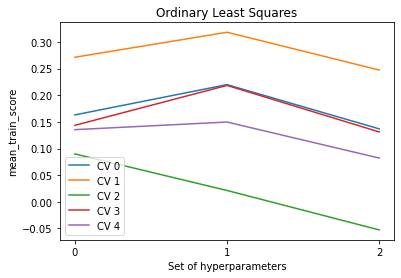

Best set of hyperparameters:  {'eta0': 1e-05}
RMSE of best model on test data set 0.7410426809483676


In [ ]:
grid = {
    'eta0': [0.0001,0.00001,0.000001]
}
reg = linear_model.SGDRegressor(learning_rate='constant',penalty=None,max_iter=1000,fit_intercept=True,shuffle=False)
GS = model_selection.GridSearchCV(
    estimator=reg, #model
    param_grid=grid, #dictionary with hyperparameters
    cv=5, #K-fold cross validation
    return_train_score=True #training score
)
GS.fit(X_train, y_train) 
print(GS.cv_results_)

#Plot
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.set_title('Ordinary Least Squares')
ax.set_xlabel('Set of hyperparameters')
ax.set_ylabel('mean_train_score')
for i in range(5):
  ylist = GS.cv_results_[f'split{i}_test_score']
  ax.plot(ylist,label=f'CV {i}')

plt.xticks([0,1,2])
plt.legend()
plt.show()

#Best Hyperparameter set
print('Best set of hyperparameters: ',GS.best_params_)

#RMSE on test set
y_test_pred = GS.best_estimator_.predict(X_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE of best model on test data set',rmse_test)

Ridge Regression

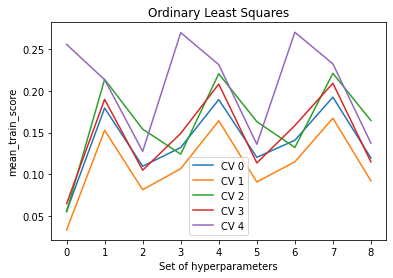

Best set of hyperparameters:  {'alpha': 0.001, 'eta0': 1e-05}
RMSE of best model on test data set 0.7410477003698532


In [ ]:
grid = {
    'eta0': [0.0001,0.00001,0.000001],
    'alpha': [1,0.1,0.001]
}
reg = linear_model.SGDRegressor(learning_rate='constant',penalty='l2',max_iter=1000,fit_intercept=True,shuffle=False)
GS = model_selection.GridSearchCV(
    estimator=reg, #model
    param_grid=grid, #dictionary with hyperparameters
    cv=5, #K-fold cross validation
    return_train_score=True #training score
)
GS.fit(X_train, y_train) 
# print(GS.cv_results_)

#Plot
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.set_title('Ordinary Least Squares')
ax.set_xlabel('Set of hyperparameters')
ax.set_ylabel('mean_train_score')
for i in range(5):
  ylist = GS.cv_results_[f'split{i}_train_score']
  ax.plot(ylist,label=f'CV {i}')

plt.xticks(np.arange(len(GS.cv_results_['params'])))
plt.legend()
plt.show()

#Best Hyperparameter set
print('Best set of hyperparameters: ',GS.best_params_)

#RMSE on test set
y_test_pred = GS.best_estimator_.predict(X_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE of best model on test data set',rmse_test)

LASSO Regression

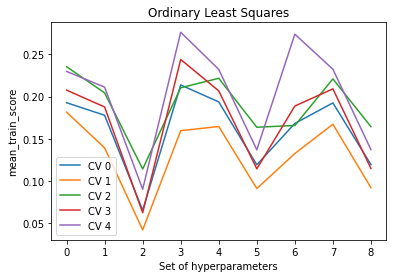

Best set of hyperparameters:  {'alpha': 0.1, 'eta0': 0.0001}
RMSE of best model on test data set 0.734484167281147


In [ ]:
grid = {
    'eta0': [0.0001,0.00001,0.000001],
    'alpha': [1,0.1,0.001]
}
reg = linear_model.SGDRegressor(learning_rate='constant',penalty='l1',max_iter=1000,fit_intercept=True,shuffle=False)
GS = model_selection.GridSearchCV(
    estimator=reg, #model
    param_grid=grid, #dictionary with hyperparameters
    cv=5, #K-fold cross validation
    return_train_score=True #training score
)
GS.fit(X_train, y_train) 
# print(GS.cv_results_)

#Plot
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.set_title('Ordinary Least Squares')
ax.set_xlabel('Set of hyperparameters')
ax.set_ylabel('mean_train_score')
for i in range(5):
  ylist = GS.cv_results_[f'split{i}_train_score']
  ax.plot(ylist,label=f'CV {i}')

plt.xticks(np.arange(len(GS.cv_results_['params'])))
plt.legend()
plt.show()

#Best Hyperparameter set
print('Best set of hyperparameters: ',GS.best_params_)

#RMSE on test set
y_test_pred = GS.best_estimator_.predict(X_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE of best model on test data set',rmse_test)

Conclusion: Since GridSearchCV test every combination of the set of hyperparameters, this method was able to find a combitation that reduce even more the error on test data set.

### Exercise 2: Higher Order Polynomial Regression

In [ ]:
#Train data
x = D1[:,:1]
y = D1[:,1:]

Task A: Prediction with high degree of polynomials

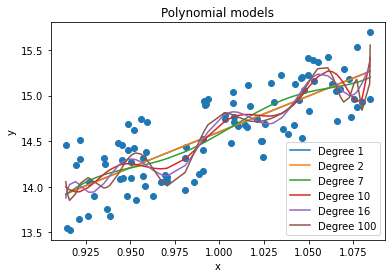

In [ ]:
plt.scatter(x,y) #plot of the train data
for d in [1,2,7,10,16,100]:
  poly = preprocessing.PolynomialFeatures(d)
  X = poly.fit_transform(x)
  reg = linear_model.LinearRegression()
  reg.fit(X, y)
  y_pred = reg.predict(X[np.argsort(X[:,1])])
  plt.plot(np.sort(x,axis=0),y_pred,label=f'Degree {d}')
plt.title('Polynomial models')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The higher the degree of the polynomial model the curlier the shape of the predicted curve. The model is overfitting the training data and trying to fit the noise behind the true signal.

Task B: Effect of Regularization

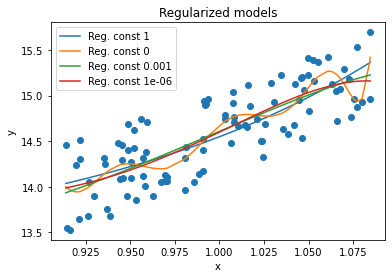

In [ ]:
plt.scatter(x,y) #plot of the train data
d = 10 #degree
poly = preprocessing.PolynomialFeatures(d)
X = poly.fit_transform(x)
for λ in [1,0,0.001,0.000001]:
  clf = linear_model.Ridge(alpha=λ)
  clf.fit(X, y)
  y_pred = clf.predict(X[np.argsort(X[:,1])])
  plt.plot(np.sort(x,axis=0),y_pred,label=f'Reg. const {λ}')
plt.title('Regularized models')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The regularization term is able to reduce the overfitting of the raw polynomial model (orange line). The higher the regularization rate, the smother the shape of the predicted curve.

### Exercise 3: Implementing Coordinate Descent

Coordinate Descent with LASSO regularization

Loss function
\begin{align}
L(\theta) &= \sum_{i=1}^N (y_i-\hat y_i)^2 + \lambda \sum_{j=1}^M |\theta_j|= \lVert y-X\theta \rVert_2^2 + \lambda \lVert \theta \rVert_1
\end{align}
Optimal theta
\begin{align}
\frac{\partial L}{\partial \theta_m}(\theta_m^*) &= - 2 \sum_{i=1}^N x_{im}(y_i-\sum_{j=1,j \neq m}^M \theta_j x_{ij}) + \theta_m^* \sum_{i=1}^N x_{im}^2 + \frac{\partial}{\partial \theta_m}(\lambda |\theta_m^*|) \\
&= - 2 \underbrace{(y - X_{-m} \theta_{-m})^T x_m}_{\rho_m} + \theta_m^* \underbrace{x_m^T x_m}_{z_m} + \frac{\partial}{\partial \theta_m}(\lambda |\theta_m^*|) = 0
\end{align}
Where:
\begin{align}
X_{-m} = X \setminus x_m \\
\theta_{-m} = \theta \setminus \{\theta_m\}
\end{align}
If $\lambda = 0$:
\begin{align}
\theta_m^* = \frac{\rho_m}{z_m}
\end{align}
If $\lambda \neq 0$:
\begin{align}
\theta_m^* = \frac{1}{z_m} S(\rho_m,\frac{\lambda}{2})
\end{align}
Where:
\begin{align}
S(\lambda,\theta_m) = 
                    \begin{cases}
                    \rho_m + \frac{1}{2} \lambda & \text{for } \rho_m < -\frac{\lambda}{2} \\
                    0 & \text{for } -\frac{\lambda}{2} \leq \rho_m \leq \frac{\lambda}{2} \\
                    \rho_m - \frac{1}{2} \lambda & \text{for } \rho_m > \frac{\lambda}{2}
                    \end{cases}
\end{align}

In [ ]:
def CoordDescent(X_tr,y_tr,lamda,k_max):
  X_tr = np.concatenate((np.ones((X_tr.shape[0],1)),X_tr),axis=1)
  N, M = X_tr.shape
  theta = np.zeros((M,1)) #initial theta
  thetas = []
  thetas.append(theta.copy())
  for k in range(k_max):
    for m in range(M):
      theta_m = np.delete(theta,m,0)
      X_m = np.delete(X_tr,m,1)
      xm = X_tr[:,m].reshape(-1,1)
      rho_m = (y_tr-X_m@theta_m).T@xm
      z_m = xm.T@xm
      if lamda == 0:
        theta[m] = rho_m/z_m
      else:
        if rho_m < - lamda/2:
          theta[m] = (rho_m + lamda/2)/z_m
        elif rho_m > lamda/2:
          theta[m] = (rho_m - lamda/2)/z_m
        else:
          theta[m] = 0
    thetas.append(theta.copy())
  return np.array(thetas)

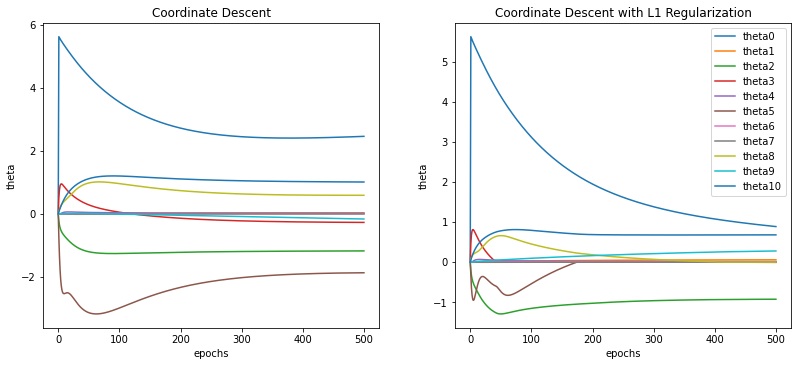

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)

#Coordinate Descent
ax1.set_title('Coordinate Descent')
ax1.set_xlabel('epochs')
ax1.set_ylabel('theta')
thetas = CoordDescent(X_train,y_train.reshape(-1,1),0,500)
xlist_1 = range(len(thetas))
for i in range(11):
  ylist_1 = thetas.T[0][i]
  ax1.plot(xlist_1,ylist_1,label=f'theta{i}')

#Coordinate Descent with L1 Regularization
ax2.set_title('Coordinate Descent with L1 Regularization')
ax2.set_xlabel('epochs')
ax2.set_ylabel('theta')
thetas = CoordDescent(X_train,y_train.reshape(-1,1),10,500)
xlist_2 = range(len(thetas))
for i in range(11):
  ylist_2 = thetas.T[0][i]
  ax2.plot(xlist_2,ylist_2,label=f'theta{i}')

fig.set_figheight(6)
fig.set_figwidth(12)

plt.tight_layout(pad=4)
plt.legend()
plt.show()

Comparison

As expected, the regularized model with LASSO lead us to a sparse solution where the parameters of less relevant features were removed. Because of this, the parameter of the remaining features took different values to better fit the training data.